In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns

In [5]:
data = pd.read_csv('https://raw.githubusercontent.com/haram4th/ADsP/main/iris3.csv')
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
data['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


<Axes: >

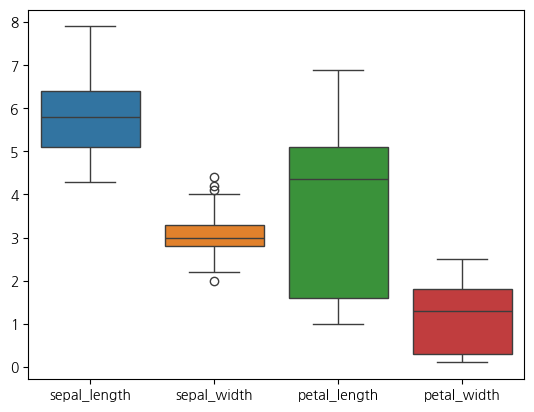

In [8]:
sns.boxplot(data)

In [9]:
data['species'].value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [19]:
X = data.drop('species', axis=1)
y = data['species']

### label encoding

In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

### one-hot encoding

In [20]:
y = pd.get_dummies(y)
y

,Iris-setosa,Iris-versicolor,Iris-virginica
0,True,False,False
1,True,False,False
2,True,False,False
3,True,False,False
4,True,False,False
...,...,...,...
145,False,False,True
146,False,False,True
147,False,False,True
148,False,False,True


### holdout

In [12]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
y_train

,Iris-setosa,Iris-versicolor,Iris-virginica
22,True,False,False
15,True,False,False
65,False,True,False
11,True,False,False
42,True,False,False
...,...,...,...
71,False,True,False
106,False,False,True
14,True,False,False
92,False,True,False


### scaling

In [15]:
from sklearn.preprocessing import MinMaxScaler

In [16]:
mms = MinMaxScaler()
mms_X_train = pd.DataFrame(mms.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
mms_X_test = pd.DataFrame(mms.transform(X_test), columns=X_test.columns, index=X_test.index)

## TensorFlow로 다중분류 분석하기

### Sequential API

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

In [24]:
model = Sequential()
model.add(Input(shape=(mms_X_train.shape[1],)))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(3, activation='softmax')) # target이 3개라 3으로!!
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 16)             │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 3)              │            15 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 267 (1.04 KB)

 Trainable params: 267 (1.04 KB)

 Non-trainable params: 0 (0.00 B)

## 다중분류의 경우 사용하는 loss
1) categorical_crossentropy : 종속변수의 클래스가 3개 이상인 경우, one-hot encoding된 경우
2) sparse_categorical_crossentropy : 종속변수의 클래스가 3개 이상인 경우, label encoding된 경우

In [31]:
y_test.flatten()

AttributeError: 'DataFrame' object has no attribute 'flatten'

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 143ms/step - accuracy: 0.9795 - loss: 0.2681 - val_accuracy: 0.9667 - val_loss: 0.2453
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9713 - loss: 0.2414 - val_accuracy: 0.9667 - val_loss: 0.2420
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9739 - loss: 0.2561 - val_accuracy: 0.9667 - val_loss: 0.2391
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9873 - loss: 0.2184 - val_accuracy: 0.9667 - val_loss: 0.2360
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9571 - loss: 0.2457 - val_accuracy: 0.9667 - val_loss: 0.2328
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9633 - loss: 0.2381 - val_accuracy: 0.9667 - val_loss: 0.2299
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9505 - loss: 0.2516 - val_accuracy: 0.9667 - val_loss: 0.2273
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9631 - loss: 0.2409 - val_accuracy: 0.9667 - val_loss

Epoch 52/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9669 - loss: 0.1385 - val_accuracy: 0.9667 - val_loss: 0.1405
Epoch 53/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9534 - loss: 0.1494 - val_accuracy: 0.9667 - val_loss: 0.1401
Epoch 54/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9635 - loss: 0.1323 - val_accuracy: 0.9667 - val_loss: 0.1386
Epoch 55/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9779 - loss: 0.1354 - val_accuracy: 0.9667 - val_loss: 0.1361
Epoch 56/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9689 - loss: 0.1318 - val_accuracy: 0.9667 - val_loss: 0.1347
Epoch 57/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9599 - loss: 0.1277 - val_accuracy: 0.9667 - val_loss: 0.1336
Epoch 58/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9777 - loss: 0.1216 - val_accuracy: 0.9667 - val_loss: 0.1340
Epoch 59/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9679 - loss: 0.1259 - val_accuracy: 0.9667 - v

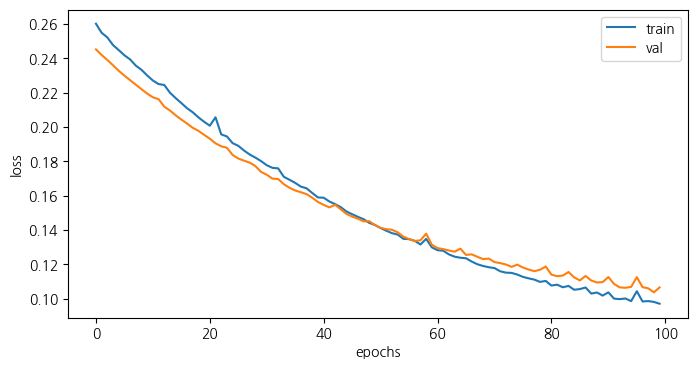

,Iris-setosa,Iris-versicolor,Iris-virginica,0,1,2
73,False,True,False,3.618665e-07,9.535835e-01,0.046416
18,True,False,False,9.994967e-01,4.738342e-11,0.000503
118,False,False,True,1.368146e-02,2.202246e-04,0.986098
78,False,True,False,4.406620e-06,8.401757e-01,0.159820
76,False,True,False,4.789362e-06,7.531287e-01,0.246867
31,True,False,False,9.987072e-01,1.134702e-09,0.001293
64,False,True,False,1.551949e-07,9.822176e-01,0.017782
141,False,False,True,1.260473e-03,1.216971e-02,0.986570
68,False,True,False,7.212642e-04,2.065748e-01,0.792704
82,False,True,False,1.918738e-07,9.787210e-01,0.021279


In [32]:
model.compile(loss='categorical_crossentropy', 
                optimizer='adam', metrics=['accuracy'])
history = model.fit(mms_X_train, y_train, epochs=100, batch_size=16,
                   validation_data=(mms_X_test, y_test))
pred = model.predict(mms_X_test)
# result = pd.DataFrame(dict(y_test=y_test.flatten(), pred=pred.flatten()))
pred = pd.DataFrame(pred, index=y_test.index)
result = pd.concat([y_test, pred], axis=1)

plt.figure(figsize=(8,4))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

result

### Functional API

In [33]:
from tensorflow.keras.models import Model

In [39]:
inputs = Input(shape=(mms_X_train.shape[1],))

x = Dense(16, activation='relu')(inputs)
x = Dense(8, activation='relu')(x)
x = Dense(4, activation='relu')(x)

# 출력층
outputs = Dense(3, activation='softmax')(x)

# 모델 정의
model = Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "functional_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 4)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 16)             │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 3)              │            15 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 267 (1.04 KB)

 Trainable params: 267 (1.04 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 131ms/step - accuracy: 0.3484 - loss: 1.0871 - val_accuracy: 0.3000 - val_loss: 1.0858
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3537 - loss: 1.0819 - val_accuracy: 0.3000 - val_loss: 1.0803
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3437 - loss: 1.0752 - val_accuracy: 0.3000 - val_loss: 1.0744
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3090 - loss: 1.0755 - val_accuracy: 0.3000 - val_loss: 1.0680
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3428 - loss: 1.0655 - val_accuracy: 0.3000 - val_loss: 1.0610
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3424 - loss: 1.0624 - val_accuracy: 0.3667 - val_loss: 1.0538
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4383 - loss: 1.0510 - val_accuracy: 0.4000 - val_loss: 1.0466
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4712 - loss: 1.0443 - val_accuracy: 0.4667 - val_loss

Epoch 52/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6513 - loss: 0.7069 - val_accuracy: 0.7000 - val_loss: 0.6776
Epoch 53/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6405 - loss: 0.7112 - val_accuracy: 0.7000 - val_loss: 0.6744
Epoch 54/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7089 - loss: 0.6921 - val_accuracy: 0.7000 - val_loss: 0.6702
Epoch 55/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6621 - loss: 0.6815 - val_accuracy: 0.7000 - val_loss: 0.6650
Epoch 56/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6082 - loss: 0.6935 - val_accuracy: 0.7000 - val_loss: 0.6585
Epoch 57/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6773 - loss: 0.6753 - val_accuracy: 0.7000 - val_loss: 0.6492
Epoch 58/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6609 - loss: 0.6687 - val_accuracy: 0.7000 - val_loss: 0.6385
Epoch 59/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7079 - loss: 0.6493 - val_accuracy: 0.7000 - v

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


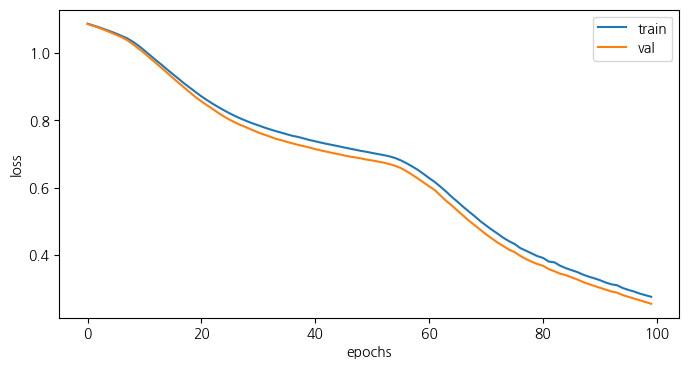

,Iris-setosa,Iris-versicolor,Iris-virginica,0,1,2
73,False,True,False,1.746837e-03,0.625794,0.372459
18,True,False,False,9.764149e-01,0.023223,0.000363
118,False,False,True,2.575083e-09,0.045666,0.954334
78,False,True,False,8.624739e-04,0.588277,0.410860
76,False,True,False,1.974077e-04,0.499612,0.500190
31,True,False,False,9.726712e-01,0.026793,0.000536
64,False,True,False,2.050369e-02,0.773899,0.205598
141,False,False,True,1.758117e-06,0.236714,0.763284
68,False,True,False,1.425769e-04,0.404649,0.595208
82,False,True,False,9.815971e-03,0.727520,0.262664


In [40]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(mms_X_train, y_train, epochs=100, batch_size=16, 
                    validation_data=(mms_X_test, y_test))
pred = model.predict(mms_X_test)
# result = pd.DataFrame(dict(y_test=y_test.flatten(), pred=pred.flatten()))
pred = pd.DataFrame(pred, index=y_test.index)
result = pd.concat([y_test, pred], axis=1)

plt.figure(figsize=(8,4))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

result

### Subclass API

In [41]:
class Iris(Model):
    def __init__(self):
        super(Iris, self).__init__()
        self.dense1 = Dense(16, activation='relu')
        self.dense2 = Dense(8, activation='relu')
        self.dense3 = Dense(4, activation='relu')
        self.classifier = Dense(3, activation='softmax')
    
    def call(self, inputs):
        x = self.dense1(inputs)
        x = self.dense2(x)
        x = self.dense3(x)
        return self.classifier(x)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 145ms/step - accuracy: 0.3267 - loss: 1.0435 - val_accuracy: 0.3667 - val_loss: 1.0211
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.3962 - loss: 1.0176 - val_accuracy: 0.3667 - val_loss: 1.0046
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3766 - loss: 1.0182 - val_accuracy: 0.6000 - val_loss: 0.9871
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5317 - loss: 1.0126 - val_accuracy: 0.6000 - val_loss: 0.9701
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6294 - loss: 0.9798 - val_accuracy: 0.6333 - val_loss: 0.9518
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6640 - loss: 0.9548 - val_accuracy: 0.6667 - val_loss: 0.9334
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6291 - loss: 0.9592 - val_accuracy: 0.7000 - val_loss: 0.9153
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6189 - loss: 0.9330 - val_accuracy: 0.7000 - val_loss

Epoch 52/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9443 - loss: 0.2689 - val_accuracy: 0.9333 - val_loss: 0.2737
Epoch 53/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9334 - loss: 0.2546 - val_accuracy: 0.9333 - val_loss: 0.2683
Epoch 54/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9648 - loss: 0.2546 - val_accuracy: 0.9333 - val_loss: 0.2609
Epoch 55/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9475 - loss: 0.2545 - val_accuracy: 0.9333 - val_loss: 0.2572
Epoch 56/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9577 - loss: 0.2457 - val_accuracy: 0.9333 - val_loss: 0.2513
Epoch 57/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9308 - loss: 0.2578 - val_accuracy: 0.9333 - val_loss: 0.2467
Epoch 58/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9727 - loss: 0.2509 - val_accuracy: 0.9333 - val_loss: 0.2424
Epoch 59/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9574 - loss: 0.2427 - val_accuracy: 0.9333 - v

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step


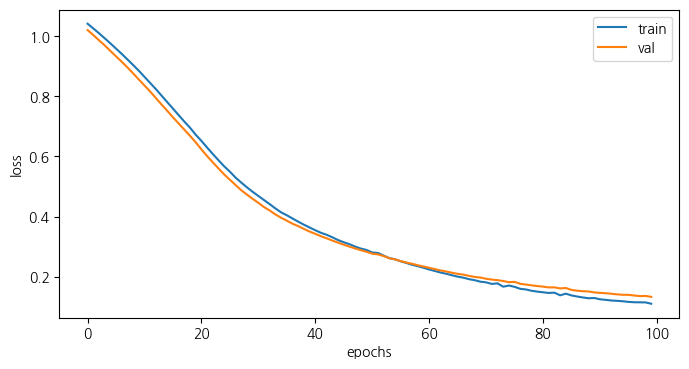

,Iris-setosa,Iris-versicolor,Iris-virginica,0,1,2
73,False,True,False,1.164877e-04,0.927697,0.072187
18,True,False,False,9.961705e-01,0.000865,0.002965
118,False,False,True,2.543803e-08,0.002463,0.997537
78,False,True,False,1.036427e-04,0.861348,0.138548
76,False,True,False,4.473643e-05,0.752150,0.247806
31,True,False,False,9.918786e-01,0.002216,0.005906
64,False,True,False,4.995544e-04,0.925248,0.074253
141,False,False,True,1.528304e-06,0.048921,0.951077
68,False,True,False,6.716050e-05,0.209340,0.790593
82,False,True,False,3.424545e-04,0.931673,0.067984


In [42]:
model = Iris()

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(mms_X_train, y_train, epochs=100, batch_size=16, 
                    validation_data=(mms_X_test, y_test))
pred = model.predict(mms_X_test)
# result = pd.DataFrame(dict(y_test=y_test.flatten(), pred=pred.flatten()))
pred = pd.DataFrame(pred, index=y_test.index)
result = pd.concat([y_test, pred], axis=1)

plt.figure(figsize=(8,4))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

result